In [1]:
import pandas as pd
import numpy as np

In [2]:
# DATA INTAKE

In [3]:
# Read in tables to dfs

In [4]:
features = pd.read_csv('features.csv')

train = pd.read_csv('train.csv')

stores = pd.read_csv('stores.csv')

test = pd.read_csv('test.csv')

feature_store = features.merge(stores, how='inner', on = "Store")

df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [5]:
# Look at datatypes and make adjustments

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [8]:
# Date can be transformed to be more granular

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df.Date.dt.year
test_df['Month'] = test_df.Date.dt.month
test_df['Day'] = test_df.Date.dt.day
test_df['WeekOfYear'] = (test_df.Date.dt.isocalendar().week)*1.0   


df = df.astype({'Year':'int32', 'Month':'int32', 'Day':'int32','WeekOfYear':'int32'})
test_df=test_df.astype({'Year':'int32', 'Month':'int32', 'Day':'int32','WeekOfYear':'int32'})

In [10]:
# DATA CLEANING

In [11]:
# Imputation of missing data

In [12]:
missing  = df.isnull().sum()

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

<AxesSubplot:>

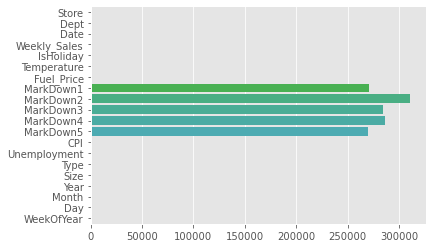

In [14]:
sns.barplot(x = missing.values, y  = missing.index)

In [15]:
# Since MarkDowns are allowed to be non-null 
# we should fill na with 0 as that is the truth for those days

In [16]:
df.fillna(0, inplace = True)

In [17]:
# EDA

In [18]:
df.describe().transpose().style.background_gradient(cmap='OrRd')

In [19]:
# Time

In [20]:
# Sales per year

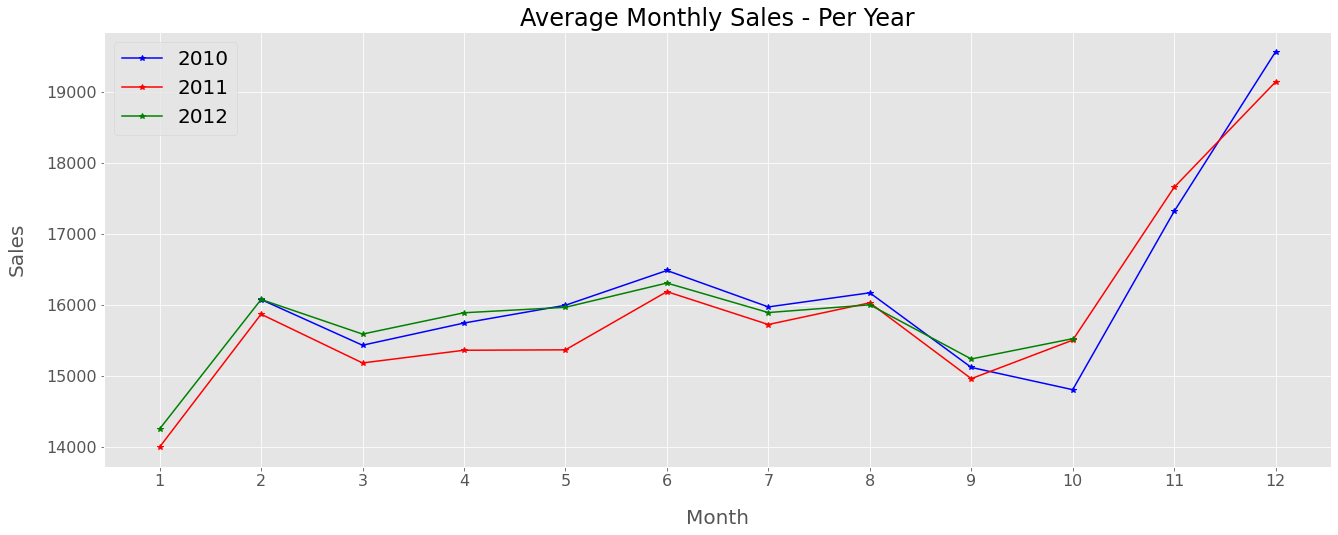

In [21]:
# How much sales each Month?

weekly_sales_2010 = df[df.Year==2010].groupby('Month')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df.Year==2011].groupby('Month')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df.Year==2012].groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, '*-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, '*-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 13, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Month', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Monthly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

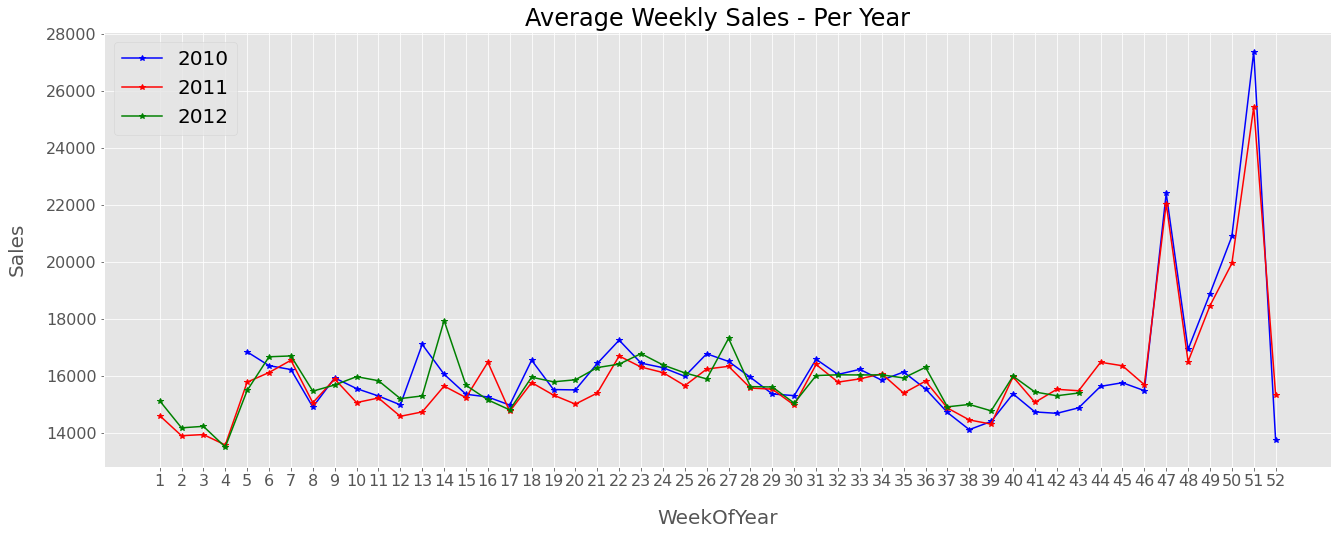

In [22]:
# How much sales each week?

weekly_sales_2010 = df[df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, '*-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, '*-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('WeekOfYear', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

In [23]:
# Weeks when it is holidays vs weeks when non-holidays

In [24]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

In [25]:
# Sales by holiday

holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_count = df.groupby('IsHoliday')['Weekly_Sales'].count()
fig = px.bar(holiday_sales, x=holiday_sales.index , 
             y=holiday_sales.values, title = 'Holiday sales', 
             color = 'Weekly_Sales', 
             color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.show()

In [26]:
fig = px.bar(holiday_count, x=holiday_count.index , 
             y=holiday_count.values, title = 'Holiday counts',
            color = 'Weekly_Sales', 
             color_discrete_sequence=px.colors.sequential.Sunsetdark)

fig.show()

In [27]:
# Store Types

In [28]:
# Distribution

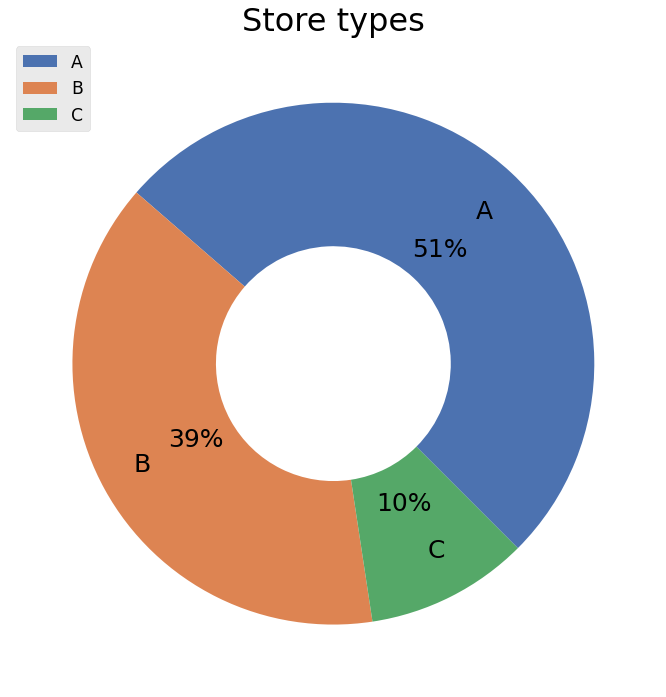

In [29]:
plt.figure(figsize=(12,12))
plt.pie(x = df['Type'].value_counts().values, 
        labels = ['A','B','C'], colors = sns.color_palette('deep'), 
        autopct='%.0f%%',labeldistance=0.80,wedgeprops=dict(width=0.55), 
        startangle=-45, textprops = dict(size = 25,) )
plt.title("Store types",fontsize = 32)
plt.legend(labels = ['A','B','C'], fontsize = 'xx-large');

In [30]:
# Average Store size by Type

(0.0, 200000.0)

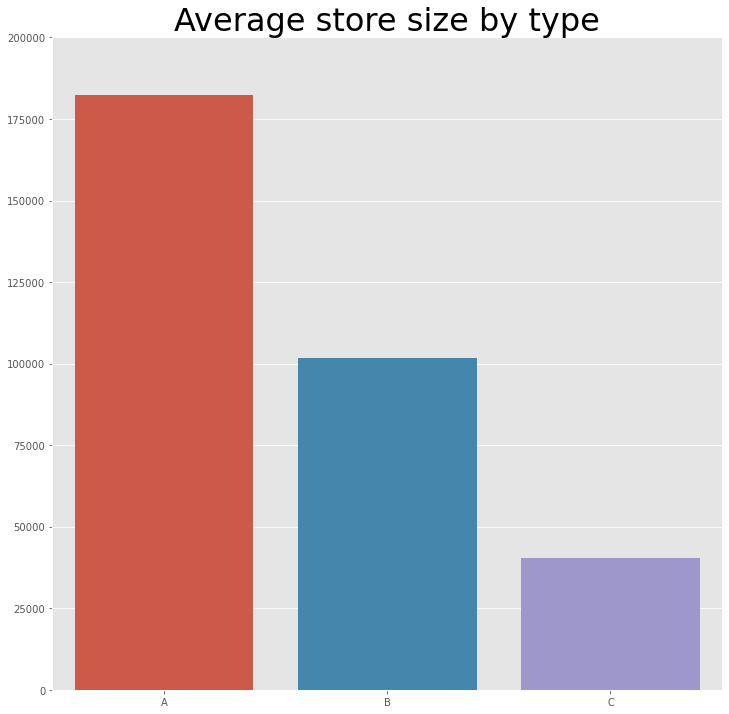

In [31]:
plt.figure(figsize=(12,12))
ax = sns.barplot(data = pd.DataFrame(df.groupby('Type')['Size'].mean().to_dict(), index = ['Type']))
plt.title("Average store size by type",fontsize = 32)
ax.set_ylim(top = 200000)

In [32]:
# Are sizes fixed?

(0.0, 200000.0)

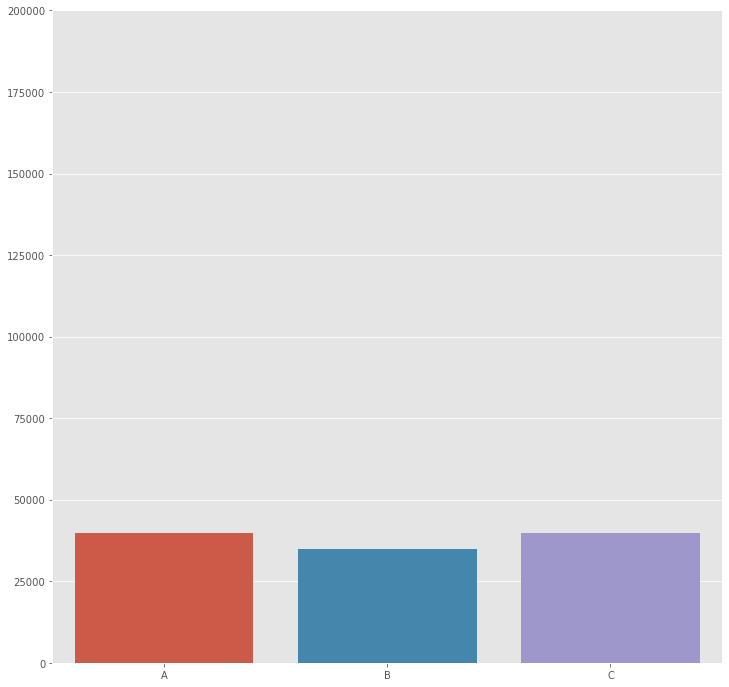

In [33]:
plt.figure(figsize=(12,12))

ax = sns.barplot(data = pd.DataFrame(df.groupby('Type')['Size'].min().to_dict(), index = ['Type']))
ax.set_ylim(top = 200000)

(0.0, 200000.0)

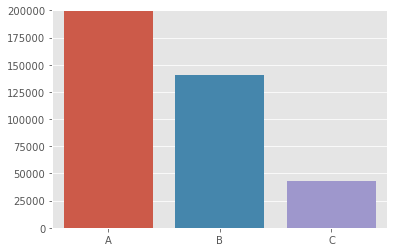

In [34]:
ax = sns.barplot(data = pd.DataFrame(df.groupby('Type')['Size'].max().to_dict(), index = ['Type']))
ax.set_ylim(top = 200000)

In [35]:
# Average Sales by Type

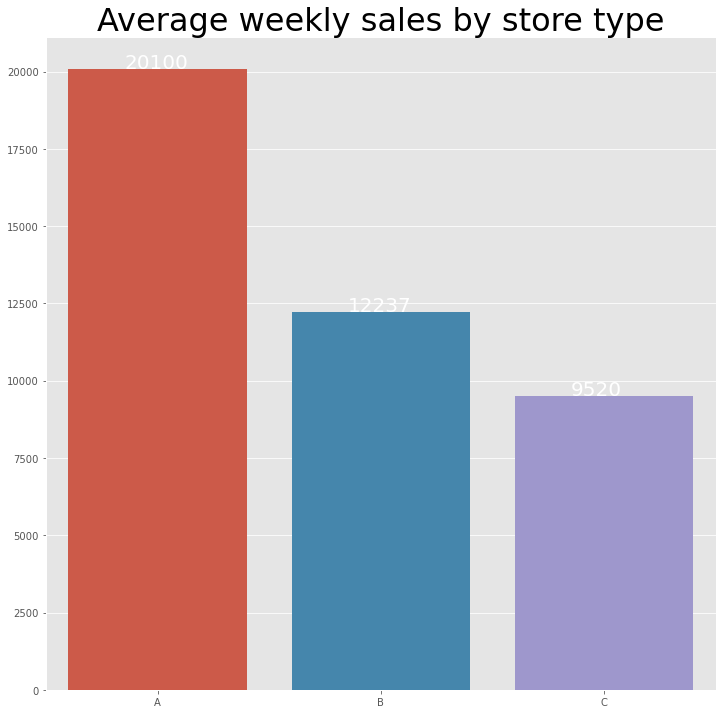

In [36]:
plt.figure(figsize=(12,12))
plt.title("Average weekly sales by store type",fontsize = 32)

ax = sns.barplot(data = pd.DataFrame(df.groupby('Type')['Weekly_Sales'].mean().to_dict(), index = ['Weekly_sales']))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()-2),fontsize = 20,color = 'w');


In [37]:
# Number of departments by type

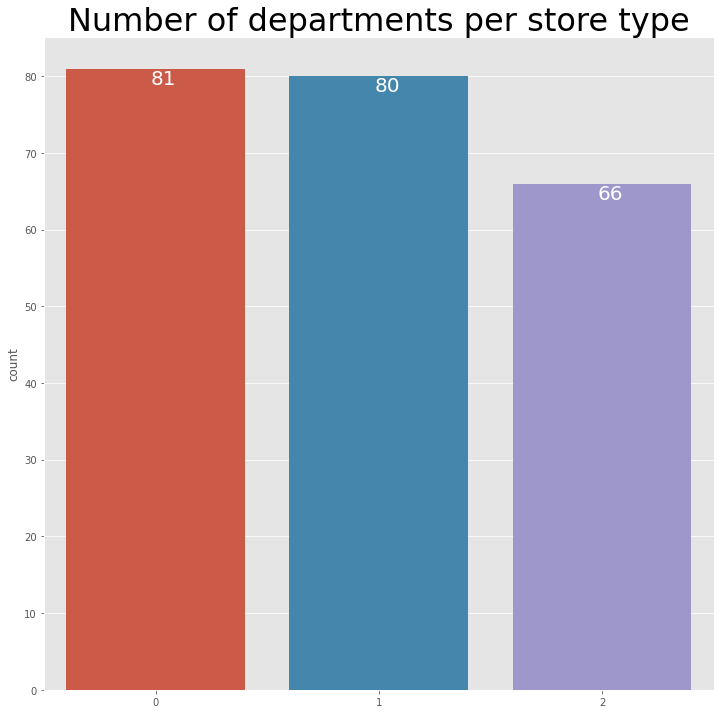

In [38]:
plt.figure(figsize=(12,12))
ax = sns.countplot(data = df.groupby('Type')['Dept'].unique())
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.38, p.get_height()-2),fontsize = 20, color = 'w')
plt.title("Number of departments per store type",fontsize = 32);

In [39]:
df.groupby('Type')['Size'].mean()

Type
A    182231.285486
B    101818.735827
C     40535.725286
Name: Size, dtype: float64

In [40]:
sales_by_size = round(df.groupby('Type')['Weekly_Sales'].mean()/df.groupby('Type')['Size'].mean(),2)

<AxesSubplot:>

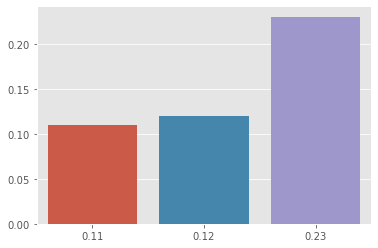

In [41]:
sns.barplot(data = sales_by_size, x = sales_by_size.index, y = sales_by_size.values)

In [42]:
# It makes sense for bigger stores to have reduced sales by size because of things like bigger bathrooms, macdonalds, etc

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

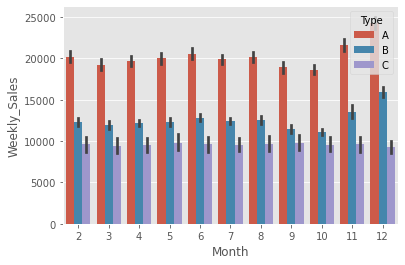

In [43]:
sns.barplot(data =df[df.Year==2010] , x = 'Month', y ='Weekly_Sales', hue = 'Type')

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

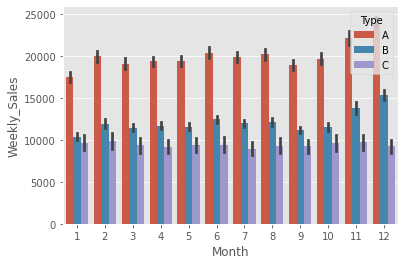

In [44]:
sns.barplot(data =df[df.Year==2011] , x = 'Month', y ='Weekly_Sales', hue = 'Type')

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

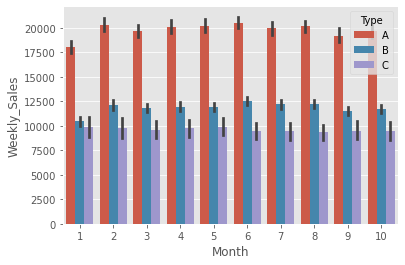

In [45]:
sns.barplot(data =df[df.Year==2012] , x = 'Month', y ='Weekly_Sales', hue = 'Type')

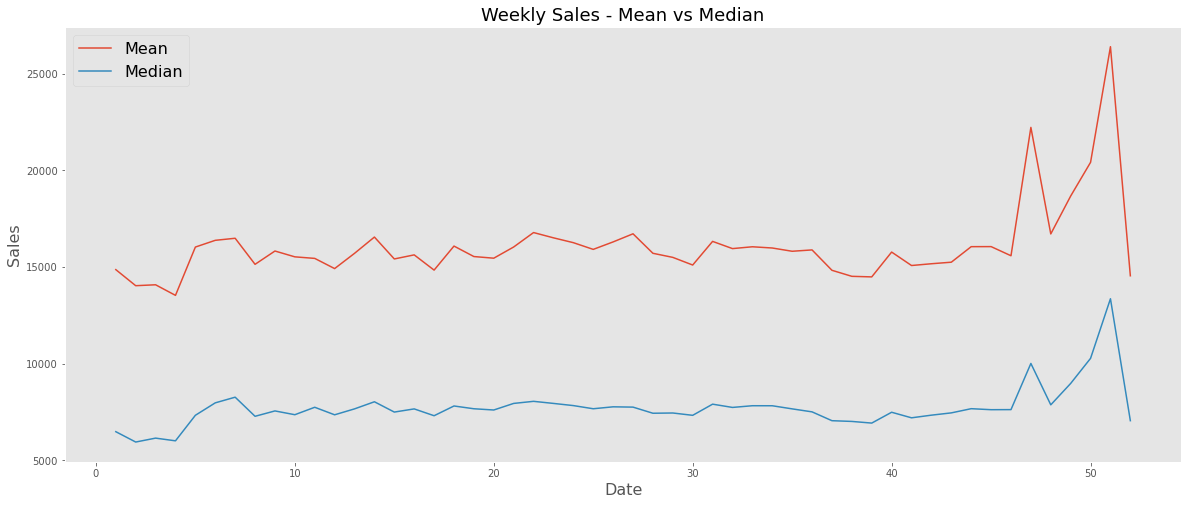

In [46]:
weekly_sales_mean = df['Weekly_Sales'].groupby(df['WeekOfYear']).mean()
weekly_sales_median = df['Weekly_Sales'].groupby(df['WeekOfYear']).median()
plt.figure(figsize=(20,8))
sns.lineplot(x =weekly_sales_mean.index, y = weekly_sales_mean.values)
sns.lineplot(x = weekly_sales_median.index, y = weekly_sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean vs Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [47]:
# Since the mean is much more choppy and higher than median, this means that sales in some stores tend to jump more than others

In [48]:
# Store Id

In [53]:
# Average sales of stores 

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

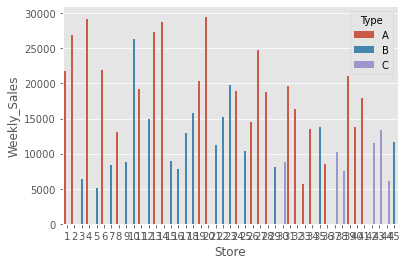

In [55]:
sns.barplot(data = df ,  x = 'Store' , y = 'Weekly_Sales', ci = None, hue = 'Type')

In [76]:
stores = df.groupby(['Store','Type'])['Weekly_Sales'].mean().sort_values(ascending = False)

In [77]:
stores = stores.reset_index()
stores

Store Type  Weekly_Sales
0      20    A  29508.301592
1       4    A  29161.210415
2      14    A  28784.851727
3      13    A  27355.136891
4       2    A  26898.070031
5      10    B  26332.303819
6      27    A  24826.984536
7       6    A  21913.243624
8       1    A  21710.543621
9      39    A  21000.763562
10     19    A  20362.126734
11     23    B  19776.180881
12     31    A  19681.907464
13     11    A  19276.762751
14     24    A  18969.106500
15     28    A  18714.889803
16     41    A  17976.004648
17     32    A  16351.621855
18     18    B  15733.313136
19     22    B  15181.218886
20     12    B  14867.308619
21     26    A  14554.129672
22     35    B  13803.596986
23     40    A  13763.632803
24     34    A  13522.081671
25     43    C  13415.114118
26      8    A  13133.014768
27     17    B  12954.393636
28     45    B  11662.897315
29     42    C  11443.370118
30     21    B  11283.435496
31     25    B  10308.157810
32     37    C  10297.355026
33     15    B   9002.493073
34      9    B   8772.890379
35     30    C   8764.237719
36     36    A   8584.412563
37      7    B   8358.766148
38     29    B   8158.810609
39     16    B   7863.224124
40     38    C   7492.478460
41      3    B   6373.033983
42     44    C   6038.929814
43     33    A   5728.414053
44      5    B   5053.415813

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

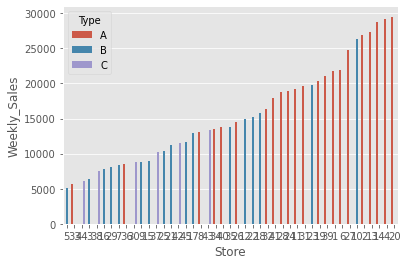

In [78]:
sns.barplot(x='Store',
            y="Weekly_Sales", 
            data=stores, 
            order=stores.sort_values('Weekly_Sales').Store, hue = 'Type')
# Desite some B store being significantly smaller than A stores, they are keeping up with weekly sales and vice versa

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

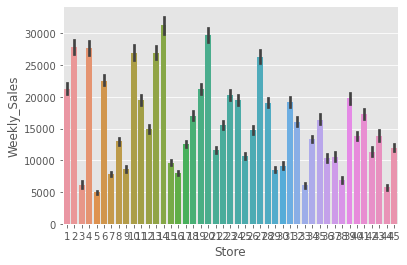

In [79]:
sns.barplot(data = df[df.Year==2010] , x ='Store', y ='Weekly_Sales')

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

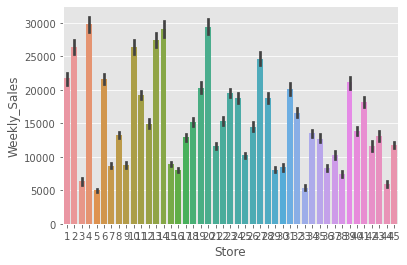

In [80]:
sns.barplot(data = df[df.Year==2011] , x ='Store', y ='Weekly_Sales')

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

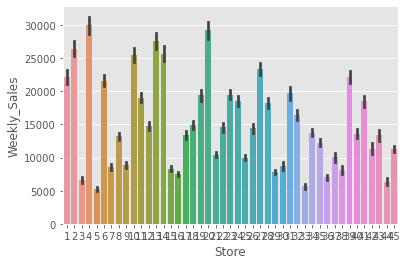

In [81]:
sns.barplot(data = df[df.Year==2012] , x ='Store', y ='Weekly_Sales')

In [82]:
# Sales seem consistent across stores throughout the years. Same trends and patterns

In [92]:
best_selling_dates = []
for i in range(1,46):
    best_selling_dates.append(df[df.Store==i].sort_values('Weekly_Sales', ascending = False).head(1)['WeekOfYear'].values[0])

In [93]:
best_selling_dates

[47,
 47,
 5,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 51,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 16,
 47,
 47,
 19,
 47,
 47,
 15,
 1,
 29,
 47,
 47,
 47,
 45,
 51,
 43,
 47]

In [94]:
best_selling = pd.DataFrame(index = range(1,46),data = best_selling_dates)

In [95]:
best_selling['Best Week'] = best_selling[0]

In [96]:
best_selling = best_selling.drop(0, axis = 1)

In [97]:
best_selling = best_selling.rename_axis('Store')

In [98]:
best_selling = best_selling.reset_index()

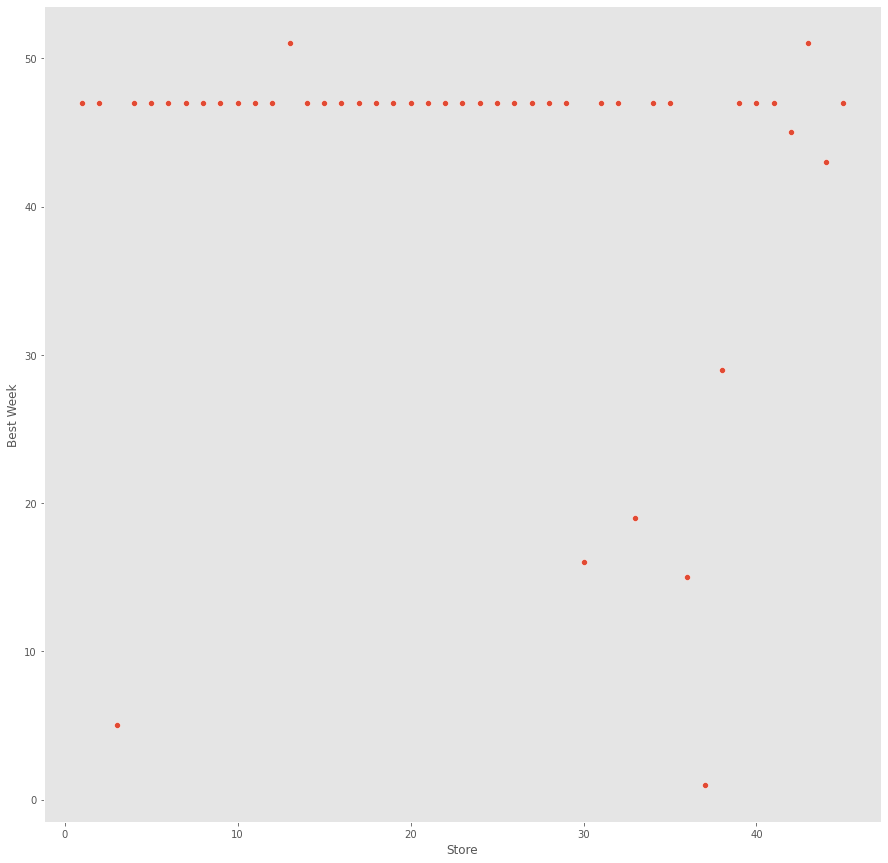

In [101]:
plt.figure(figsize=(15,15))
sns.scatterplot(data = best_selling, x = best_selling.Store, y = best_selling['Best Week'])
plt.grid();

In [102]:
# Most stores make most sales from 45-51 weeks but there are defeinitely some outliers.

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

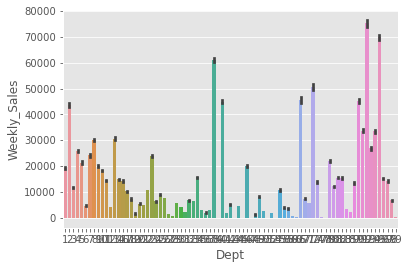

In [103]:
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales')

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

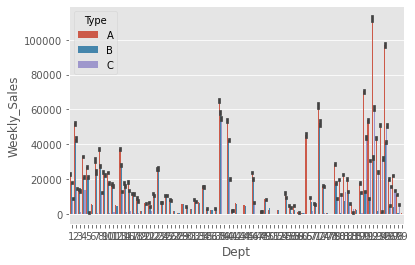

In [104]:
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales', hue = 'Type')


In [105]:
# Does the presence of certain departments diminish weekly sales driven by each individual department?
# We can see that it does because departments in type C stores consistently outsell type B stores which have more departments

In [106]:
# Let's see by how much

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

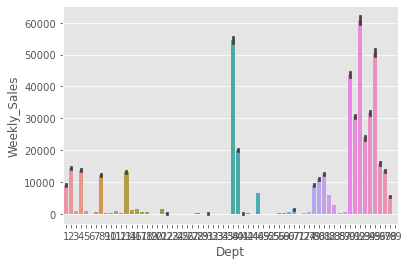

In [107]:
sns.barplot(data = df[df.Type=='C'], x = 'Dept', y='Weekly_Sales')

In [108]:
C_depts = df[df.Type=='C'].groupby('Dept')['Weekly_Sales'].mean()
B_depts = df[df.Type=='B'].groupby('Dept')['Weekly_Sales'].mean()

In [109]:
outselling_depts = (C_depts - B_depts).sort_values(ascending = False).dropna()[:10]

In [110]:
outselling_depts = outselling_depts.reset_index()
outselling_depts

Dept  Weekly_Sales
0    90  30595.091788
1    94  30379.969030
2    92  28325.569893
3    93  22231.357102
4    91  21796.727846
5    96  11020.842206
6    80  10543.395412
7    97   9692.442092
8    95   9336.795670
9    98   5160.552153

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

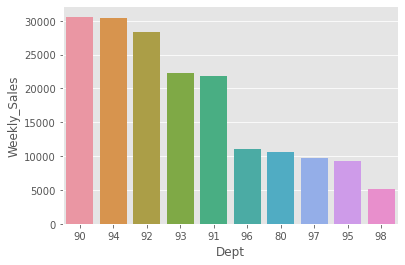

In [111]:
sns.barplot(data = outselling_depts, 
            x = 'Dept', 
            y = 'Weekly_Sales', 
            order=outselling_depts.sort_values('Weekly_Sales', ascending= False).Dept)

In [112]:
# On average, type C depts that outsell type B depts by more than 20k a week are  90,94,92,93,91
# Are these the best selling depts in type A? If yes, then maybe type C is just a miniature more efficient version of type A

In [113]:
seasonal_depts = (df.groupby("Dept")['Weekly_Sales'].max() -df.groupby("Dept")['Weekly_Sales'].mean()).sort_values(ascending=False)[:10].reset_index()

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

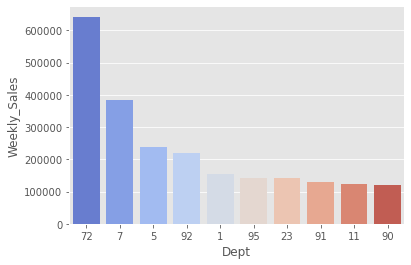

In [114]:
sns.barplot(data = seasonal_depts, 
            x = 'Dept', 
            y = 'Weekly_Sales', 
            order=seasonal_depts.sort_values('Weekly_Sales', ascending= False).Dept, palette = 'coolwarm')

In [133]:
# Which departments change the most for the holidays?

In [134]:
seasonal_depts_ratio = (df.groupby("Dept")['Weekly_Sales'].max()/df.groupby("Dept")['Weekly_Sales'].mean()).sort_values(ascending=False)[:10].reset_index()

In [135]:
seasonal_depts_ratio

Dept  Weekly_Sales
0    59     70.841427
1    99     30.205513
2    41     21.779111
3     7     16.844693
4    18     16.370542
5    56     14.050268
6    72     13.706686
7    32     13.629170
8    54     12.658580
9    45     12.408889

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

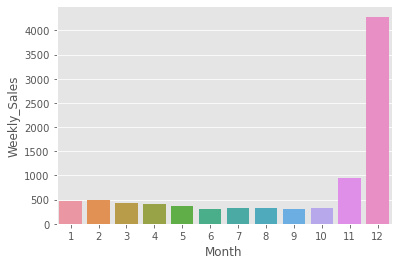

In [119]:
sns.barplot(data = df[df.Dept == 59], x = 'Month', y ='Weekly_Sales', ci=None)

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

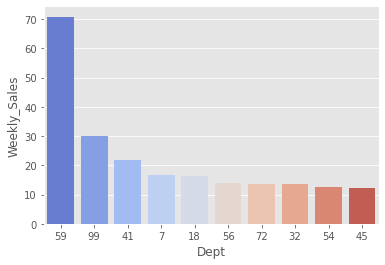

In [136]:
sns.barplot(data = seasonal_depts_ratio, 
            x = 'Dept', 
            y = 'Weekly_Sales', 
            order=seasonal_depts_ratio.sort_values('Weekly_Sales', ascending= False).Dept, palette = 'coolwarm')

In [141]:
df['size_cat'] = df['Size'].apply(lambda x: 1 if x <55000 else (2 if x < 125000 else 3))

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

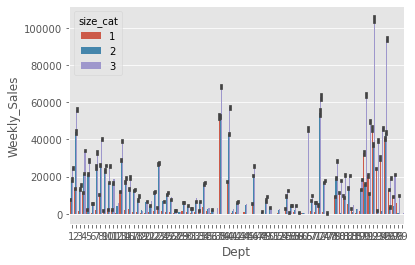

In [144]:
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales', hue = 'size_cat')


In [149]:
# MACRO ECONOMIC FACTORS

In [ ]:
df['Fuel']

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

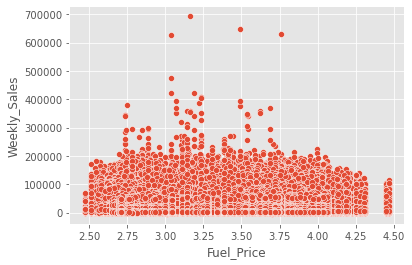

In [156]:
sns.scatterplot(data = df , x = 'Fuel_Price' , y = 'Weekly_Sales')

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

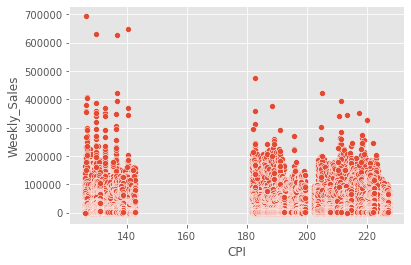

In [178]:
sns.scatterplot(data = df , x = 'CPI' , y = 'Weekly_Sales')

In [165]:
df['CPI_cat']= df['CPI'].apply(lambda x : 1 if x <160 else (2 if x < 200 else 3) )

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

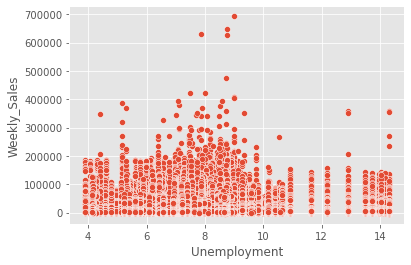

In [155]:
sns.scatterplot(data = df , x = 'Unemployment' , y = 'Weekly_Sales')

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

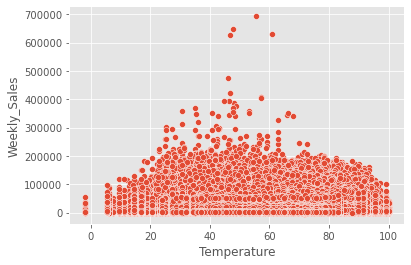

In [158]:
sns.scatterplot(data = df , x = 'Temperature' , y = 'Weekly_Sales')

<AxesSubplot:xlabel='Date', ylabel='CPI'>

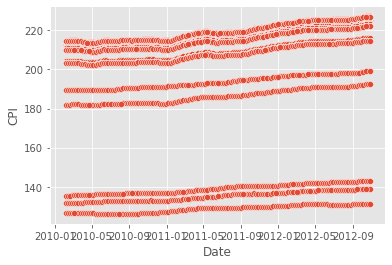

In [160]:
sns.scatterplot(data = df , x = 'Date' , y = 'CPI')

In [161]:
df.groupby('Store')['CPI'].mean()

Store
1     215.995525
2     215.651869
3     219.402843
4     128.680070
5     216.576516
6     217.564946
7     193.671740
8     219.438474
9     219.683641
10    128.664162
11    219.425860
12    128.689692
13    128.674214
14    186.287850
15    135.094570
16    193.745791
17    128.698410
18    135.108679
19    135.087130
20    209.047863
21    215.664705
22    139.014695
23    135.099311
24    135.096021
25    209.045306
26    135.108480
27    139.017071
28    128.682214
29    135.092059
30    215.669669
31    215.638806
32    193.654661
33    128.736826
34    128.663519
35    139.021332
36    214.796376
37    214.872865
38    128.728632
39    214.723962
40    135.105260
41    193.699067
42    128.749375
43    207.728805
44    128.720845
45    186.299226
Name: CPI, dtype: float64

In [166]:
df.groupby('Store')['CPI_cat'].mean()

Store
1     3.0
2     3.0
3     3.0
4     1.0
5     3.0
6     3.0
7     2.0
8     3.0
9     3.0
10    1.0
11    3.0
12    1.0
13    1.0
14    2.0
15    1.0
16    2.0
17    1.0
18    1.0
19    1.0
20    3.0
21    3.0
22    1.0
23    1.0
24    1.0
25    3.0
26    1.0
27    1.0
28    1.0
29    1.0
30    3.0
31    3.0
32    2.0
33    1.0
34    1.0
35    1.0
36    3.0
37    3.0
38    1.0
39    3.0
40    1.0
41    2.0
42    1.0
43    3.0
44    1.0
45    2.0
Name: CPI_cat, dtype: float64

In [170]:
df[df['CPI_cat']==3].groupby(['Store','Type'])['Weekly_Sales'].mean()

Store  Type
1      A       21710.543621
2      A       26898.070031
3      B        6373.033983
5      B        5053.415813
6      A       21913.243624
8      A       13133.014768
9      B        8772.890379
11     A       19276.762751
20     A       29508.301592
21     B       11283.435496
25     B       10308.157810
30     C        8764.237719
31     A       19681.907464
36     A        8584.412563
37     C       10297.355026
39     A       21000.763562
43     C       13415.114118
Name: Weekly_Sales, dtype: float64

In [173]:
df.corr()['Weekly_Sales'].sort_values()

Store          -0.085195
Unemployment   -0.025864
CPI            -0.020921
CPI_cat        -0.014668
Year           -0.010111
Day            -0.006187
Temperature    -0.002312
Fuel_Price     -0.000120
IsHoliday       0.012774
MarkDown2       0.020716
WeekOfYear      0.027673
Month           0.028409
MarkDown4       0.037467
MarkDown3       0.038562
MarkDown1       0.047172
MarkDown5       0.050465
Dept            0.148032
size_cat        0.206432
Size            0.243828
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='CPI'>

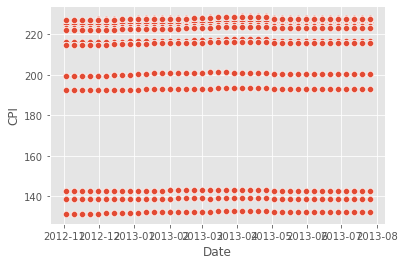

In [198]:
sns.scatterplot(data = test_df , x = 'Date' , y = 'CPI')

<AxesSubplot:xlabel='Date', ylabel='Unemployment'>

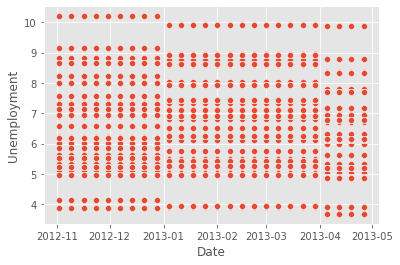

In [202]:
sns.scatterplot(data = test_df , x = 'Date' , y = 'Unemployment')

In [187]:
test_df[test_df.CPI.isnull()]

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
26          1     1 2013-05-03      False        66.66       3.386    2298.63   
27          1     1 2013-05-10      False        63.90       3.392    4624.61   
28          1     1 2013-05-17      False        69.53       3.454   16170.50   
29          1     1 2013-05-24      False        77.19       3.494    7959.89   
30          1     1 2013-05-31      False        78.02       3.466    2369.77   
...       ...   ...        ...        ...          ...         ...        ...   
115059     45    98 2013-06-28      False        76.05       3.639    4842.29   
115060     45    98 2013-07-05      False        77.50       3.614    9090.48   
115061     45    98 2013-07-12      False        79.37       3.614    3789.94   
115062     45    98 2013-07-19      False        82.84       3.737    2961.49   
115063     45    98 2013-07-26      False        76.06       3.804     212.02   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment Type  \
26           2.00     129.90      55.46    1301.04  NaN           NaN    A   
27          83.88      42.38    1618.31    8144.90  NaN           NaN    A   
28          92.00       8.32    4127.24    6206.97  NaN           NaN    A   
29         178.00    1621.47    3152.57    2938.70  NaN           NaN    A   
30         142.45     475.35      45.55    2056.84  NaN           NaN    A   
...           ...        ...        ...        ...  ...           ...  ...   
115059     975.03       3.00    2449.97    3169.69  NaN           NaN    B   
115060    2268.58     582.74    5797.47    1514.93  NaN           NaN    B   
115061    1827.31      85.72     744.84    2150.36  NaN           NaN    B   
115062    1047.07     204.19     363.00    1059.46  NaN           NaN    B   
115063     851.73       2.06      10.88    1864.57  NaN           NaN    B   

          Size  Year  Month  Day  WeekOfYear  
26      151315  2013      5    3          18  
27      151315  2013      5   10          19  
28      151315  2013      5   17          20  
29      151315  2013      5   24          21  
30      151315  2013      5   31          22  
...        ...   ...    ...  ...         ...  
115059  118221  2013      6   28          26  
115060  118221  2013      7    5          27  
115061  118221  2013      7   12          28  
115062  118221  2013      7   19          29  
115063  118221  2013      7   26          30  

[38162 rows x 19 columns]

In [196]:
test_df.groupby('Store')['CPI'].mean()

Store
1     224.281139
2     223.913217
3     227.827106
4     132.041095
5     224.868819
6     225.907641
7     200.509848
8     227.879744
9     228.071776
10    132.041601
11    227.831218
12    132.043319
13    132.040173
14    192.868090
15    138.728865
16    200.511268
17    132.038180
18    138.729137
19    138.730160
20    216.901881
21    223.914770
22    142.799875
23    138.729653
24    138.730548
25    216.903807
26    138.730259
27    142.800527
28    132.040873
29    138.728904
30    223.920608
31    223.918632
32    200.509263
33    132.050282
34    132.042746
35    142.800414
36    222.949662
37    222.943026
38    132.028550
39    222.950435
40    138.728717
41    200.510573
42    132.048970
43    215.576773
44    132.044422
45    192.873089
Name: CPI, dtype: float64

In [195]:
test_df['CPI'] = test_df.groupby('Store')['CPI'].transform(lambda value: value.fillna(value.mean()))

In [204]:
test_df['Unemployment'] = test_df.groupby('Store')['Unemployment'].transform(lambda value: value.fillna(value.mean()))

In [205]:
test_df.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI                 0
Unemployment        0
Type                0
Size                0
Year                0
Month               0
Day                 0
WeekOfYear          0
dtype: int64

In [206]:
test_df = test_df.fillna(0)